<a href="https://colab.research.google.com/github/histofyi/api.histo.fyi/blob/main/Peptide_Classification_for_Nonamers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing an automatic classification of MHC bound nonamer peptide structures
Predicting the bound peptide strutcture of MHC molecules is challenging due to the concerted movements within the binding cleft, however given the large number of MHC Class I structures we should be able to find some correlations between sequence and structure of both the MHC class I molecule and the bound peptide. 


In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# Set the output display to have one digit for decimal places and limit it to
# printing 15 rows.
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15
plt.figure(figsize = (15,20))

peptide_angle_data = pd.read_csv("https://raw.githubusercontent.com/histofyi/notebooks/main/data/integer_nonamers.csv", 
                              sep=",", 
                              encoding='latin-1',
                              index_col = ["complex_id"])

for row in peptide_angle_data:
  peptide_angle_data[row] = pd.to_numeric(peptide_angle_data[row], errors='coerce').fillna(0).astype(np.int64)


# Look a the first 5 columns just to eyeball the data
peptide_angle_data.head()



,p1_psi,p2_phi,p2_psi,p3_phi,p3_psi,p4_phi,p4_psi,p5_phi,p5_psi,p6_phi,p6_psi,p7_phi,p7_psi,p8_phi,p8_psi,p9_phi
complex_id,,,,,,,,,,,,,,,,
7mkb_1,108,154,297,129,304,345,282,145,238,153,241,125,226,139,289,296
6vma_1,144,158,278,175,289,166,288,128,310,165,283,148,278,148,276,288
7n6d_1,103,159,295,133,298,335,283,161,258,153,228,134,222,142,262,290
7n6d_2,103,160,296,139,299,345,291,179,212,162,226,138,226,142,269,291
7n6d_3,104,159,297,133,300,350,288,171,215,161,229,137,227,143,271,292


<Figure size 1080x1440 with 0 Axes>

In [ ]:
# Next, check the data shape, this should match the spreadsheet, don't forget the complex_id's aren't considered in this
rows, cols = peptide_angle_data.shape
print(f'There are {rows} rows and {cols} columns') 

There are 570 rows and 16 columns


In [ ]:
# here we're checking that we've got the right number of the right sort of item, we've simplified the data so that all the angles are positive integers
for row in peptide_angle_data:
  items = [item for item in peptide_angle_data[row] if isinstance(item, int)]
  print('{angle} : {count} items'.format(angle = row, count = len(items)))
print(peptide_angle_data.dtypes)

p1_psi : 570 items
p2_phi : 570 items
p2_psi : 570 items
p3_phi : 570 items
p3_psi : 570 items
p4_phi : 570 items
p4_psi : 570 items
p5_phi : 570 items
p5_psi : 570 items
p6_phi : 570 items
p6_psi : 570 items
p7_phi : 570 items
p7_psi : 570 items
p8_phi : 570 items
p8_psi : 570 items
p9_phi : 570 items
p1_psi    int64
p2_phi    int64
p2_psi    int64
p3_phi    int64
p3_psi    int64
          ...  
p7_phi    int64
p7_psi    int64
p8_phi    int64
p8_psi    int64
p9_phi    int64
Length: 16, dtype: object


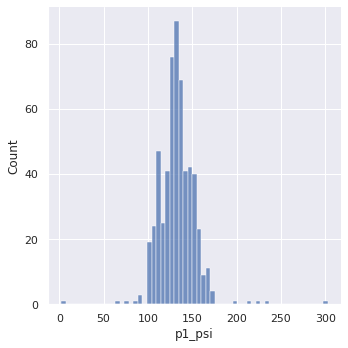

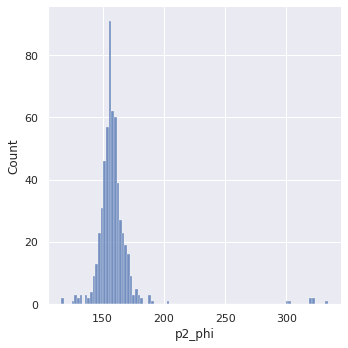

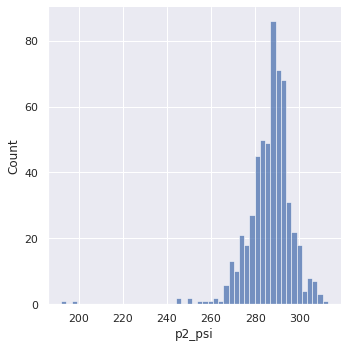

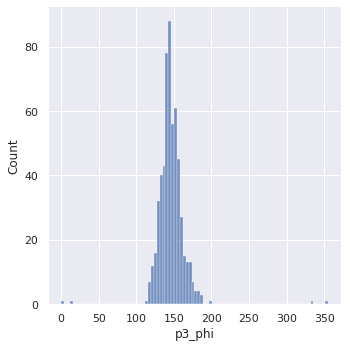

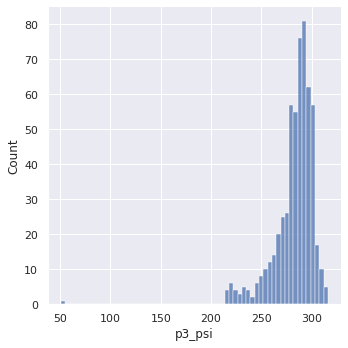

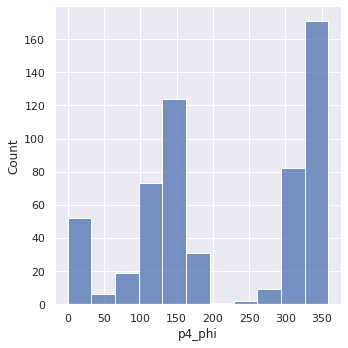

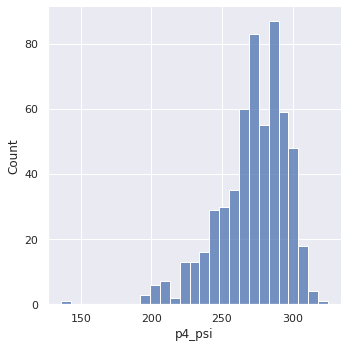

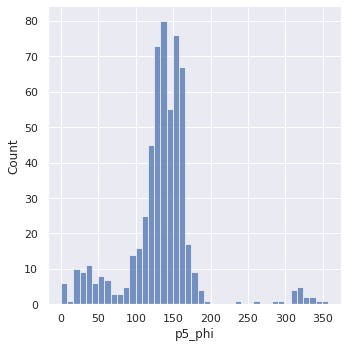

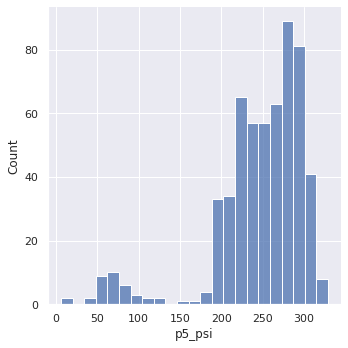

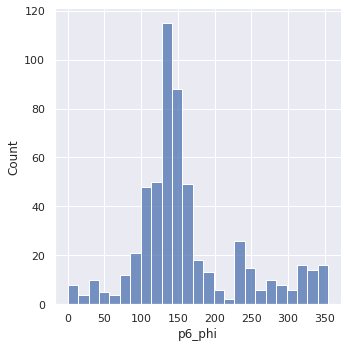

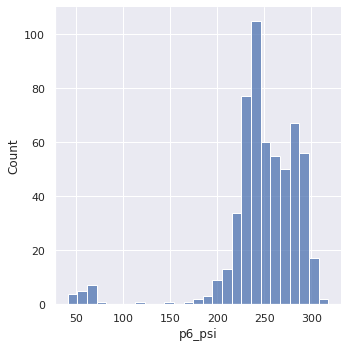

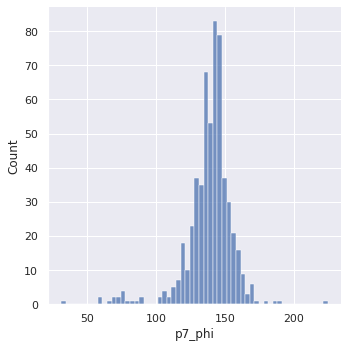

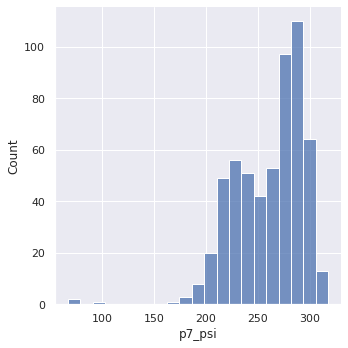

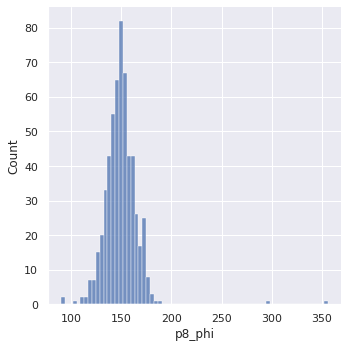

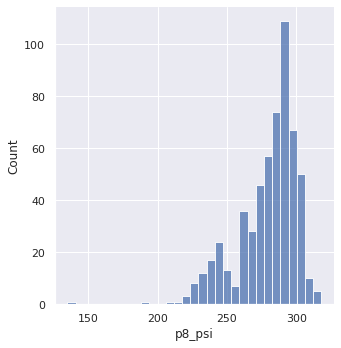

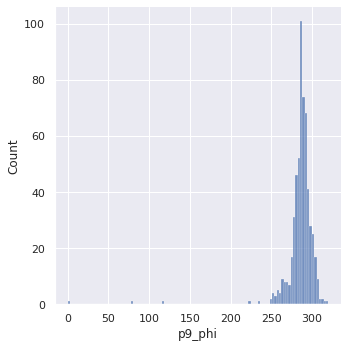

In [ ]:
for row in peptide_angle_data:
  sns.displot(peptide_angle_data[row])

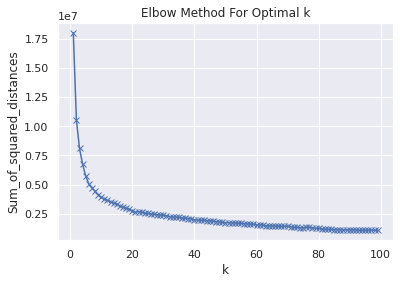

In [ ]:
# now for the clustering, first of all, we're going to find the elbow of the dataset - interestingly when this is found, the clustering is suboptimal using it. So we'll see what to do here
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
  kmeans = KMeans(
    init="random",
    n_clusters=k,
    n_init=50,
    max_iter=300,
    random_state=42
  )
  kmeans.fit(peptide_angle_data)
  Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [180]:
number_of_clusters = 20 # this is a number that seems to work well for the nonamers

kmeans = KMeans(
    init="random",
    n_clusters=number_of_clusters,
    n_init=50,
    max_iter=300,
    random_state=42
  )
kmeans.fit(peptide_angle_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=20, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [181]:
# these are the centres of the clusters, you could, in theory create a consensus peptide for each cluster by using these angles, can also look at deviation of a structure from these to see if there are outliers which are clustered
kmeans.cluster_centers_


array([[131.81, 156.45, 288.13, 150.39, 277.81, 163.84, 239.35,  36.39,
         72.97, 130.29, 283.29, 145.65, 271.68, 150.1 , 290.52, 283.68],
       [118.93, 158.03, 286.73, 142.33, 299.58, 329.74, 291.7 , 154.84,
        209.29, 130.37, 234.78, 141.53, 277.07, 145.97, 292.58, 285.97],
       [134.25, 159.  , 279.25, 158.75, 280.  , 294.5 , 278.25, 139.5 ,
         30.75,  88.75, 209.  , 116.5 , 240.75, 137.75, 269.  , 288.25],
       [125.64, 166.27, 285.73, 167.64, 236.73, 144.45, 274.91, 312.36,
        287.55, 296.18,  70.09, 142.45, 281.73, 154.18, 262.27, 288.64],
       [133.77, 154.6 , 285.25, 148.69, 263.5 , 124.15, 275.6 , 117.33,
        271.  , 331.5 , 261.1 , 141.25, 249.1 , 164.54, 275.94, 291.29],
       [159.  , 203.  , 285.  , 147.  ,  51.  , 329.  , 274.  , 155.  ,
        259.  , 164.  , 195.  ,  74.  , 217.  , 152.  , 234.  , 287.  ],
       [135.1 , 158.71, 287.32, 141.29, 284.12, 341.1 , 270.73, 136.07,
        288.46, 126.54, 258.98, 128.49, 231.8 , 141.  , 25

In [93]:
# how many iterations the K means ran through to generate the clusters

kmeans.n_iter_


16

In [182]:
# now it gets interesting as we can see what is clustered with what

cluster_map = pd.DataFrame()
cluster_map['data_index'] = peptide_angle_data.index.values
cluster_map['cluster'] = kmeans.labels_

i = 0

clusters = {}
while i < number_of_clusters:
  print (i)
  this_pdb_codes = []
  this_cluster = []
  for item in cluster_map[cluster_map.cluster == i]['data_index']:
      pdb_code = item.split('_')[0]
      if pdb_code not in this_cluster:
        this_pdb_codes.append(pdb_code)
      this_cluster.append(item)
  print (this_cluster)
  pymol_statement = 'pymol '
  for item in this_cluster:
    pymol_statement += '{file_name}_no_het.pdb '.format(file_name=item)
  print (pymol_statement)
  print (len(this_pdb_codes))
  clusters[i] = this_cluster
  i += 1


0
['6vb0_1', '6vb1_1', '6vb2_1', '6m24_1', '5xos_1', '5f1i_1', '5f1i_2', '5f1i_3', '5f1i_4', '5f1i_5', '5f1i_7', '5f1i_8', '5enw_1', '5eo1_1', '5eo0_1', '4u1j_1', '4u1h_1', '4pgb_1', '4pgb_2', '4l8d_2', '3qfd_1', '3qfd_2', '2guo_1', '2guo_2', '2gtw_1', '2gtw_2', '2gtz_1', '2gtz_2', '1jht_1', '1vad_1', '2vab_1']
pymol 6vb0_1_no_het.pdb 6vb1_1_no_het.pdb 6vb2_1_no_het.pdb 6m24_1_no_het.pdb 5xos_1_no_het.pdb 5f1i_1_no_het.pdb 5f1i_2_no_het.pdb 5f1i_3_no_het.pdb 5f1i_4_no_het.pdb 5f1i_5_no_het.pdb 5f1i_7_no_het.pdb 5f1i_8_no_het.pdb 5enw_1_no_het.pdb 5eo1_1_no_het.pdb 5eo0_1_no_het.pdb 4u1j_1_no_het.pdb 4u1h_1_no_het.pdb 4pgb_1_no_het.pdb 4pgb_2_no_het.pdb 4l8d_2_no_het.pdb 3qfd_1_no_het.pdb 3qfd_2_no_het.pdb 2guo_1_no_het.pdb 2guo_2_no_het.pdb 2gtw_1_no_het.pdb 2gtw_2_no_het.pdb 2gtz_1_no_het.pdb 2gtz_2_no_het.pdb 1jht_1_no_het.pdb 1vad_1_no_het.pdb 2vab_1_no_het.pdb 
31
1
['7kgo_1', '6o4y_1', '6o4z_1', '6q3k_1', '5ylx_1', '6ggm_1', '5e00_1', '5f9j_1', '5meq_1', '5mer_1', '5mer_2', '4pg9_

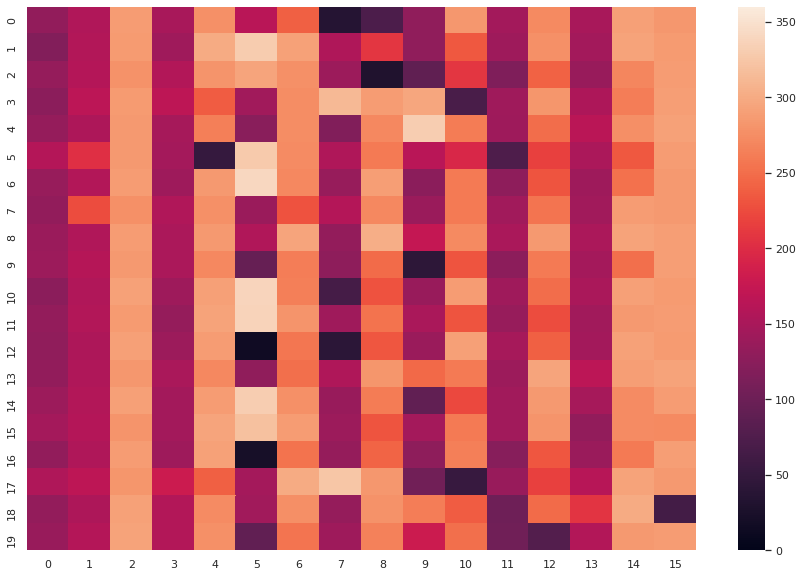

In [185]:
plt.figure(figsize = (15,10))
sns.heatmap(kmeans.cluster_centers_, vmin=0, vmax=360, yticklabels=True)

set 3 there are 11 members of this set
______________________________________________________________


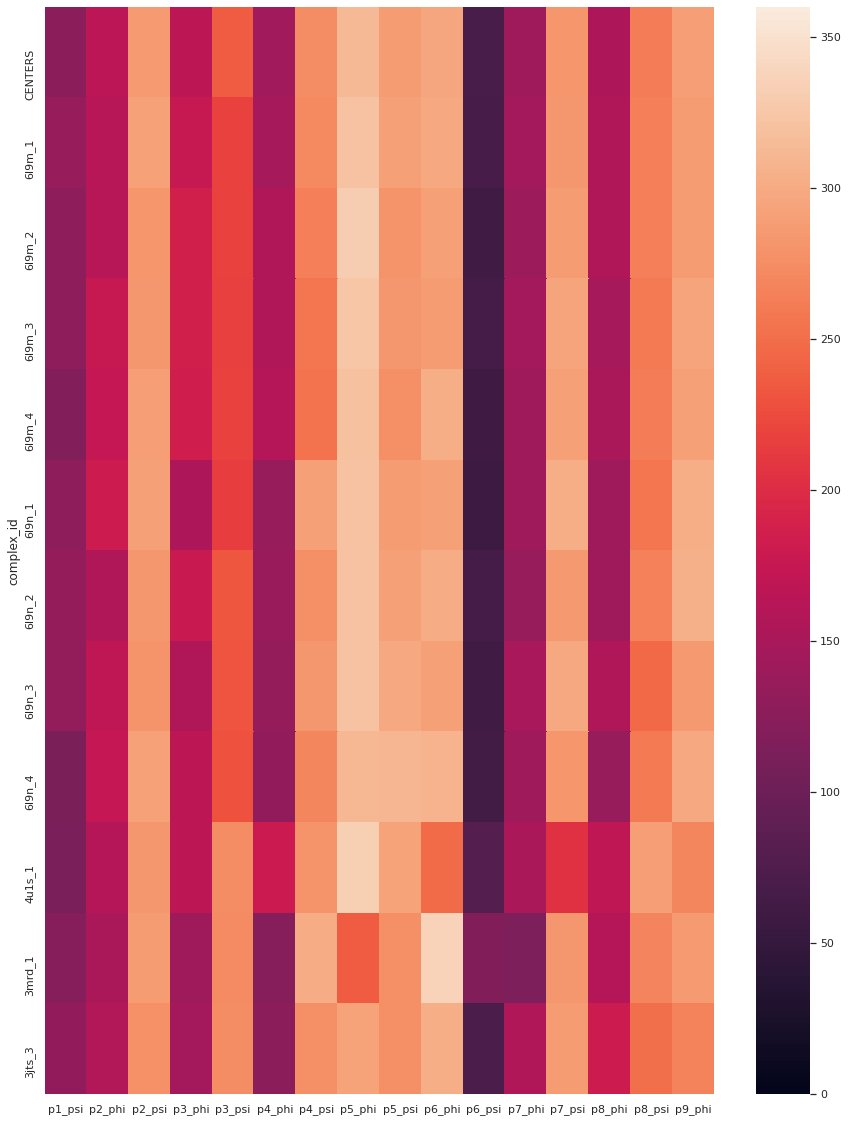

In [190]:
#@title Pick a set (from 0-19)
current_row =  3#@param {type:"integer"}

j = 0
k = 0

labels = [row for row in peptide_angle_data]
current_centers = {'complex_id':['CENTERS']}
current_set = clusters[current_row]


for centers in kmeans.cluster_centers_:
  if j == current_row:
    for center in centers:
      current_centers[labels[k]] = [center]
      k += 1
  j += 1

print('set {current_row} there are {member_count} members of this set'.format(current_row = current_row, member_count = len(current_set)))
print('______________________________________________________________')

this_center = pd.DataFrame.from_dict(current_centers)
this_center.set_index('complex_id', inplace=True)

frames = [this_center, peptide_angle_data.loc[current_set]]

result = pd.concat(frames)

plt.figure(figsize = (15,20))
sns.heatmap(result, vmin=0, vmax=360, yticklabels=True)

